In [0]:
import numpy as np 
import pandas as pd 

from keras.optimizers import SGD, Adam
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from scipy.interpolate import griddata

# Any results you write to the current directory are saved as output.
from google.colab import drive
drive.mount('/content/mydrive')

In [0]:
labels = pd.read_csv('/content/mydrive/My Drive/DM_DATA/Train.csv', usecols=['label']).astype(int)
train_data = pd.read_csv('/content/mydrive/My Drive/DM_DATA/interpolated_train.csv')
test_data = pd.read_csv('/content/mydrive/My Drive/DM_DATA/interpolated_test.csv')

In [0]:
def interpolation(array):
    x = np.arange(0, array.shape[1])
    y = np.arange(0, array.shape[0])
    array = np.ma.masked_invalid(array)
    xx, yy = np.meshgrid(x, y)
    x1 = xx[~array.mask]
    y1 = yy[~array.mask]
    newarr = array[~array.mask]
    GD1 = griddata((x1, y1), newarr.ravel(),(xx, yy), method='cubic', fill_value=255)
    return GD1.reshape(1024,)

In [0]:
for i in range(0, train.shape[0]):
    train.iloc[i] = interpolation(np.array(train.iloc[i]).reshape(32,32))
    
for i in range(0, test.shape[0]):
    test.iloc[i] = interpolation(np.array(test.iloc[i]).reshape(32,32))

In [0]:
def imgShow(im):
    res = np.array(im).reshape(32,32)
    plt.imshow(res,interpolation='nearest', cmap = plt.cm.gray)

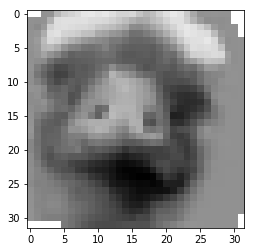

In [4]:
imgShow(train_data.iloc[1])

In [0]:
train = train_data.values.reshape(train_data.shape[0], 32, 32, 1)
test = test_data.values.reshape(test_data.shape[0], 32, 32, 1)
labels = to_categorical(labels, 10)

In [0]:
# The taitest model

num_filters=32
ac='relu'
adm=Adam(lr=0.0001, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0.5

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, input_shape=(32, 32, 1), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(train, labels, batch_size=128, epochs=100, validation_split=0.25)

In [0]:
# Prediction
res = model.predict_classes(test)

In [0]:
submission = pd.read_csv('/content/mydrive/My Drive/DM_DATA/sample.csv')
submission['label'] = res
submission.to_csv('/content/mydrive/My Drive/DM_DATA/submission_model9.csv', index=False)